In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [162]:
df = pd.read_csv("Pre-Processed_data.csv")
df.head(1000)

,Unnamed: 0,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)",...,"Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
0,Arab World_1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World_1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World_1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World_1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World_1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,IDA & IBRD total_2011,NaN,NaN,48.961686,79.488298,67.146418,94.941087,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.048751
996,IDA & IBRD total_2012,NaN,NaN,49.728459,82.516324,71.959075,95.262306,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.250608
997,IDA & IBRD total_2013,NaN,NaN,50.485826,82.668276,72.588066,95.402286,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.372097
998,IDA & IBRD total_2014,NaN,NaN,51.119957,83.304654,72.707130,95.532262,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.592552


In [163]:
df.columns.tolist()

['Unnamed: 0',
 '2005 PPP conversion factor, GDP (LCU per international $)',
 '2005 PPP conversion factor, private consumption (LCU per international $)',
 'Access to clean fuels and technologies for cooking (% of population)',
 'Access to electricity (% of population)',
 'Access to electricity, rural (% of rural population)',
 'Access to electricity, urban (% of urban population)',
 'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, poorest 40% (% of population ages 

In [164]:
#set index to country name for easy filtering
df = df.set_index("Unnamed: 0")

In [165]:
#get current account balance of 
test = df.loc[:, "Current account balance (BoP, current US$)"]

In [169]:
test

Unnamed: 0
Arab World_1960             NaN
Arab World_1961             NaN
Arab World_1962             NaN
Arab World_1963             NaN
Arab World_1964             NaN
                       ...     
Zimbabwe_2014     -2.405182e+09
Zimbabwe_2015     -1.678451e+09
Zimbabwe_2016     -7.179652e+08
Zimbabwe_2017     -3.078109e+08
Zimbabwe_2018               NaN
Name: Current account balance (BoP, current US$), Length: 15576, dtype: float64

In [174]:
debt = test.filter(like="2017").sort_values().head(10)
debt

Unnamed: 0
United States_2017    -4.491370e+11
United Kingdom_2017   -9.837441e+10
Turkey_2017           -4.734700e+10
Canada_2017           -4.638815e+10
India_2017            -3.816766e+10
Australia_2017        -3.575791e+10
Argentina_2017        -3.159787e+10
Algeria_2017          -2.205871e+10
Mexico_2017           -1.940132e+10
Pakistan_2017         -1.625104e+10
Name: Current account balance (BoP, current US$), dtype: float64

In [175]:
indexes =debt.index.values.tolist()
indexes

['United States_2017',
 'United Kingdom_2017',
 'Turkey_2017',
 'Canada_2017',
 'India_2017',
 'Australia_2017',
 'Argentina_2017',
 'Algeria_2017',
 'Mexico_2017',
 'Pakistan_2017']

In [190]:
gdp = df.loc[indexes, "GDP (current US$)"]

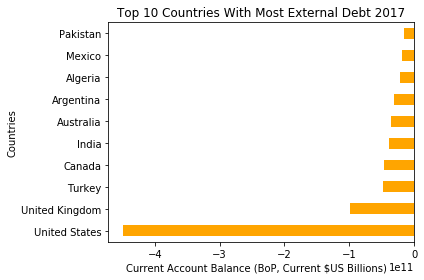

In [191]:
indexNames = map(lambda str: str[:-5], indexes)
ax = debt.plot(x="Country", y="Current Account Balance", kind="barh",
                   title="Top 10 Countries With Most External Debt 2017", color="orange")
ax.set_xlabel("Current Account Balance (BoP, Current $US Billions)   ")
ax.set_ylabel("Countries")
ax.set_yticklabels(list(indexNames))
plt.tight_layout()
plt.savefig('debt.png')

# https://www.investopedia.com/terms/c/currentaccount.asp

In [208]:
fdi = df.loc[:, "Foreign direct investment, net outflows (BoP, current US$)"]

In [209]:
fdi = fdi.filter(like="2017")
fdi = fdi.sort_values(ascending=False)

In [210]:
indexes1 = gdp.index.values
indexes1

array(['United States_2017', 'United Kingdom_2017', 'Turkey_2017',
       'Canada_2017', 'India_2017', 'Australia_2017', 'Argentina_2017',
       'Algeria_2017', 'Mexico_2017', 'Pakistan_2017'], dtype=object)

In [211]:
fdi = fdi.loc[indexes1].sort_values(ascending=False)
fdi

Unnamed: 0
United States_2017     3.792210e+11
United Kingdom_2017    1.470779e+11
Canada_2017            8.119933e+10
India_2017             1.109015e+10
Australia_2017         4.494928e+09
Mexico_2017            3.384592e+09
Turkey_2017            2.701000e+09
Argentina_2017         1.155630e+09
Pakistan_2017          5.200000e+07
Algeria_2017          -3.375857e+06
Name: Foreign direct investment, net outflows (BoP, current US$), dtype: float64

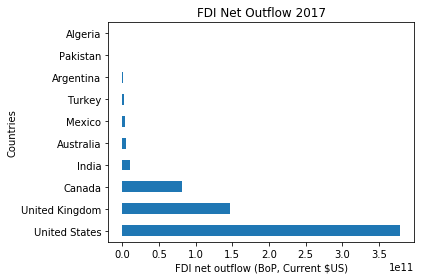

In [221]:
indexNames = map(lambda str: str[:-5], fdi.index.values)
bx = fdi.plot(x="Country",y="FDI Net Outflow", kind="barh", title="FDI Net Outflow 2017")
bx.set_xlabel("FDI net outflow (BoP, Current $US)")
bx.set_ylabel("Countries")
bx.set_yticklabels(indexNames)
plt.tight_layout()
plt.savefig('FDIO.png')

# https://en.wikipedia.org/wiki/Net_capital_outflow

In [274]:
fdio = df.loc[:, "Foreign direct investment, net inflows (BoP, current US$)"]
fdio = fdio.filter(like="2017")
fdio = fdio.sort_values(ascending=False)
fdio = fdio.loc[indexes1].sort_values(ascending=False)
fdio

Unnamed: 0
United States_2017     3.548280e+11
United Kingdom_2017    6.468540e+10
Australia_2017         4.257972e+10
India_2017             3.996609e+10
Mexico_2017            3.212686e+10
Canada_2017            2.752563e+10
Argentina_2017         1.151686e+10
Turkey_2017            1.088600e+10
Pakistan_2017          2.815000e+09
Algeria_2017           1.200965e+09
Name: Foreign direct investment, net inflows (BoP, current US$), dtype: float64

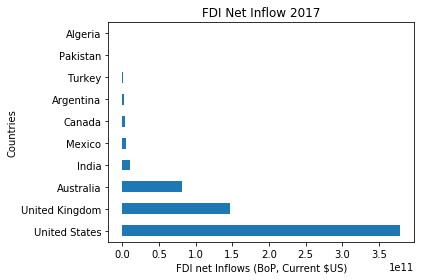

In [275]:
indexNamesO = map(lambda str: str[:-5], fdio.index.values)
bx = fdi.plot(x="Country",y="FDI Net inflows", kind="barh", title="FDI Net Inflow 2017")
bx.set_xlabel("FDI net Inflows (BoP, Current $US)")
bx.set_ylabel("Countries")
bx.set_yticklabels(indexNamesO)
plt.tight_layout()
plt.savefig('FDII.png')

In [246]:
usIn = df.loc[:, "Foreign direct investment, net inflows (BoP, current US$)"]
usIn = usIn.filter(like="United States")

In [250]:
usIn = usIn.filter(like="_201")

In [258]:
usIn = usIn[:-1]

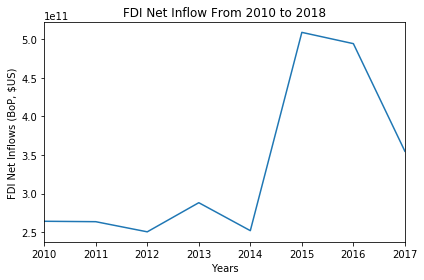

In [273]:
indexNamesUS = map(lambda str: str[-4:], usIn.index.values)
cx = usIn.plot(x="Year",y="FDI Net Inflows (BoP, $US)", kind="line", title="FDI Net Inflow From 2010 to 2018")
cx.set_xticklabels(indexNamesUS)
cx.set_xlabel("Years")
cx.set_ylabel("FDI Net Inflows (BoP, $US)")
plt.tight_layout()
plt.savefig('USFDI.png')